<a href="https://colab.research.google.com/github/HienNguyenMinh/ImageProcessing/blob/main/L5_3_Image_Averaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Images to Colab working directory
!pip uninstall gdown -y && pip install gdown
#Create a folder "Images" on Colab
!rm -rf /content/Images
!mkdir Images
#Down load Images from google drive link and import to the Colab folder
!gdown --folder https://drive.google.com/drive/folders/1w9QCEQ_ShE2n3BlBqvyNvEZXYmGi6t2s?usp=share_link -O /content/Images

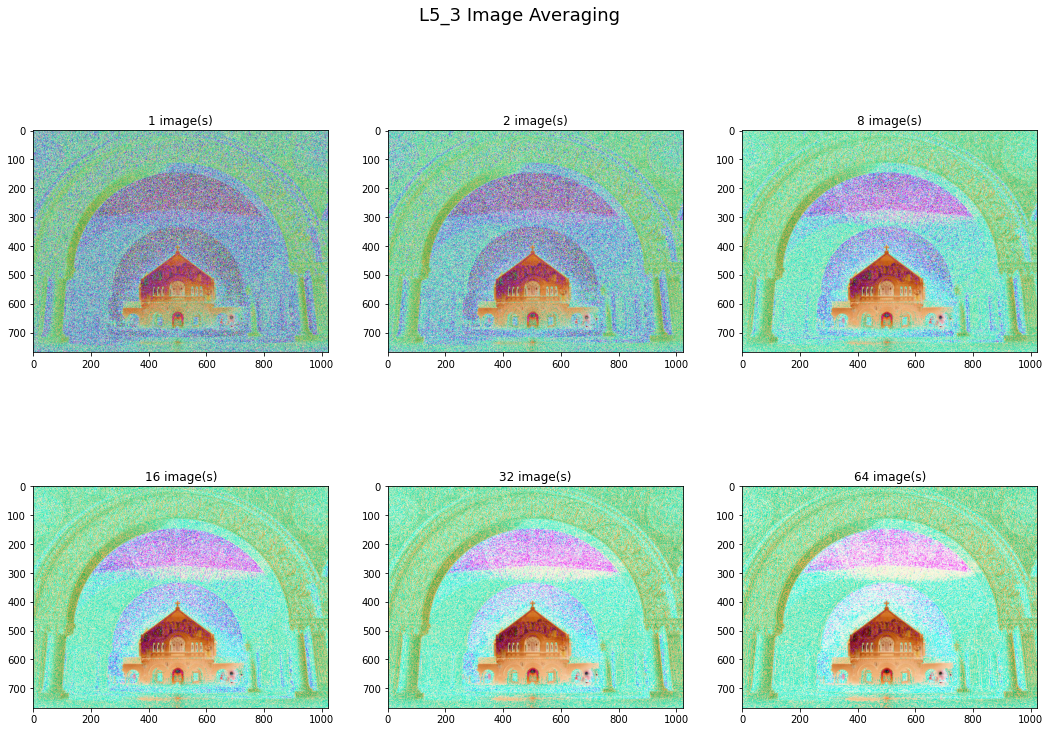

In [3]:
#Exercise Day 3
#L5_3 Image Averaging
#Student: Nguyen Thi Minh Hien

#Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import color

#Define noise_gauss that adds gaussian noisy to image
#Input: 
#   image: original image
#   m: mean value
#   v: varriance value
#Output: return noisyImage after adding gaussian noisy
def noisy_gauss(image, m, v):
   row,col,ch = image.shape
   mean = m
   var = v
   sigma = var**0.5
   gauss = np.random.normal(mean,sigma,(row,col,ch))
   gauss = gauss.reshape(row,col,ch)
   noisyImg = image + gauss
   return noisyImg

#read image
Img = cv2.imread('/content/Images/quadnight.jfif');
#Convert image to rgb2gray
#Img = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY);


nArray = [1, 2, 8, 16, 32, 64];
#Create a subplot with rows, columns to show multiple image
fig, ax = plt.subplots(2,len(nArray)//2, figsize=(18,12));
row = 0;
col = 0;
#repeat over number of sample images
for index in range(len(nArray)):
  N = nArray[index];
  avgImg = np.zeros(Img.shape); #initialize an empty image
  
  for j in range(N):
    noisyImg = noisy_gauss(Img, 0, 0.01);
    avgImg = avgImg + noisyImg;    

  #show image
  avgImg = avgImg / N;
  row = index//3;
  ax[row,col].imshow((avgImg*255).astype(np.uint8));    
  ax[row,col].set_title(str(N) + ' image(s)');
  
  col +=1;
  if col > 2: col = 0;
plt.suptitle('L5_3 Image Averaging', fontsize = 18);
plt.show();


